## ANALYZING VEHICLE PRICES

The dataset comprises various attributes related to vehicles listed on an American online marketplace. These attributes include the car's make and model, its condition, mileage, price, as well as additional information such as basics, vehicle history, and reviews. Furthermore, the dataset includes seller-related details such as seller rating, the count of ratings, and seller address. In total, the dataset encompasses more than 9000 vehicle entries, providing a comprehensive snapshot of the marketplace's offerings and seller reputations.

# Data Understanding

Utilize numpy and pandas for evaluating data characteristics and conducting essential cleaning and adjustments. This involves detecting missing values, duplicates, inconsistent entries, and ensuring proper data types. This process enhances data clarity and facilitates the development of insights.

In [240]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [241]:
#importing the dataset
car4sales= pd.read_csv('cars_for_sale(uncleaned).csv')
car4sales

,Car,Condition,Mileage,Price,Basics Info,Vehicle History Info,Vehicle Reviews Info,Seller Rating,Seller Rating Count,Seller Address
0,2024 Lexus LC 500 Base,New,0 mi.,"$112,865MSRP $118,865","{'Exterior color': ' Caviar ', 'Interior color...",{},{},4.7,"(1,261 reviews)","1250 W Division St Chicago, IL 60642"
1,2007 Acura TSX Base,Used,"61,110 mi.","$11,295",{'Exterior color': ' Alabaster Silver Metallic...,{'Accidents or damage': 'At least 1 accident o...,{},4.2,(440 reviews),"1301 N Elston Ave Chicago, IL 60642"
2,2016 McLaren 675LT Base,Used,"6,305 mi.","$219,997$5,464 price drop","{'Exterior color': ' McLaren Orange ', 'Interi...",{'Accidents or damage': 'At least 1 accident o...,"{'Comfort': '5.0', 'Interior': '5.0', 'Perform...",3.1,(421 reviews),"1561 N Fremont St Chicago, IL 60642"
3,2016 Audi TTS 2.0T quattro,Used,"65,715 mi.","$23,999","{'Exterior color': ' Black ', 'Interior color'...",{'Accidents or damage': 'At least 1 accident o...,"{'Comfort': '3.0', 'Interior': '5.0', 'Perform...",3.6,(123 reviews),"560 E North Ave West Chicago, IL 60185"
4,2018 BMW 740e xDrive iPerformance,Used,"19,830 mi.","$39,799$100 price drop","{'Exterior color': ' Imperial Blue Metallic ',...","{'Accidents or damage': 'None reported', 'Clea...","{'Comfort': '5.0', 'Interior': '5.0', 'Perform...",4.4,(91 reviews),"6539 Ogden Ave Berwyn, IL 60402"
...,...,...,...,...,...,...,...,...,...,...
9241,NaN,NaN,NaN,NaN,{},{},{},NaN,NaN,NaN
9242,2022 BMW X3 xDrive30i,Used,"48,804 mi.","$27,979$998 price drop","{'Exterior color': ' Dark Graphite Metallic ',...","{'Accidents or damage': 'None reported', '1-ow...",{},4.8,"(3,739 reviews)","1313 Rand Road Des Plaines, IL 60016"
9243,2024 GMC Sierra 1500 Pro,New,3 mi.,"$51,080MSRP $51,080","{'Exterior color': ' Summit White ', 'Interior...",{},"{'Comfort': '5.0', 'Interior': '5.0', 'Perform...",4.5,"(3,896 reviews)","8425 159th St Tinley Park, IL 60487"
9244,2012 GMC Terrain SLT-1,Used,"146,694 mi.","$8,995","{'Exterior color': ' Black ', 'Interior color'...",{'Accidents or damage': 'At least 1 accident o...,{},NaN,NaN,"13840 South Pulaski Road Crestwood, IL 60445"


In [242]:
#summary of the data
car4sales.describe()

,Seller Rating
count,7716.000000
mean,4.383307
std,0.609811
min,1.300000
25%,4.200000
50%,4.600000
75%,4.800000
max,5.000000


In [243]:
#shape of the data
car4sales.shape

(9246, 10)

In [244]:
#analysing column names present
list(car4sales.columns)

['Car',
 'Condition',
 'Mileage',
 'Price',
 'Basics Info',
 'Vehicle History Info',
 'Vehicle Reviews Info',
 'Seller Rating',
 'Seller Rating Count',
 'Seller Address']

In [245]:
#inspecting the data
car4sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9246 entries, 0 to 9245
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Car                   9071 non-null   object 
 1   Condition             9071 non-null   object 
 2   Mileage               9071 non-null   object 
 3   Price                 9071 non-null   object 
 4   Basics Info           9242 non-null   object 
 5   Vehicle History Info  9242 non-null   object 
 6   Vehicle Reviews Info  9242 non-null   object 
 7   Seller Rating         7716 non-null   float64
 8   Seller Rating Count   7716 non-null   object 
 9   Seller Address        8954 non-null   object 
dtypes: float64(1), object(9)
memory usage: 722.5+ KB


# Data Cleaning

In [246]:
#checking for blanks
car4sales.isna().sum().sort_values()

Basics Info                4
Vehicle History Info       4
Vehicle Reviews Info       4
Car                      175
Condition                175
Mileage                  175
Price                    175
Seller Address           292
Seller Rating           1530
Seller Rating Count     1530
dtype: int64

In [247]:
#removing blanks
car4sales.dropna(inplace=True)

In [248]:
#checking for duplicates
car4sales['Car'].duplicated().sum()

4843

In [249]:
#removing duplicates
cars4sale= car4sales.drop_duplicates(inplace=True)

In [250]:
#inspecting data after removing blanks and duplicates
car4sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5762 entries, 0 to 9243
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Car                   5762 non-null   object 
 1   Condition             5762 non-null   object 
 2   Mileage               5762 non-null   object 
 3   Price                 5762 non-null   object 
 4   Basics Info           5762 non-null   object 
 5   Vehicle History Info  5762 non-null   object 
 6   Vehicle Reviews Info  5762 non-null   object 
 7   Seller Rating         5762 non-null   float64
 8   Seller Rating Count   5762 non-null   object 
 9   Seller Address        5762 non-null   object 
dtypes: float64(1), object(9)
memory usage: 495.2+ KB


In [251]:
#shape of data
car4sales.shape

(5762, 10)

In [252]:
#splitting columns
#split car column into two
def split_car_info(car_info):
    parts = car_info.split(' ', 1)
    if len(parts) == 2:
        return parts[0], parts[1]
    else:
        return parts[0], None

car4sales[['Year', 'Make_Model']] = car4sales['Car'].apply(lambda x: pd.Series(split_car_info(x)))

# Drop the original car column
car4sales.drop(columns=['Car'], inplace=True)

In [253]:
# Split the 'basics info' column by comma and expand into separate columns
split_info = car4sales['Basics Info'].str.split(', ', expand=True)

# Assign the split columns to new column names
car4sales['Exterior_Color'] = split_info[0]
car4sales['Interior_Color'] = split_info[1]
car4sales['Drive_Train'] = split_info[2]

# Drop the original 'basics info' column
car4sales.drop(columns=['Basics Info'], inplace=True)

In [254]:
# Replace spaces with underscores in column headers
car4sales.columns = car4sales.columns.str.replace(' ', '_')

In [255]:
car4sales.head(2)

,Condition,Mileage,Price,Vehicle_History_Info,Vehicle_Reviews_Info,Seller_Rating,Seller_Rating_Count,Seller_Address,Year,Make_Model,Exterior_Color,Interior_Color,Drive_Train
0,New,0 mi.,"$112,865MSRP $118,865",{},{},4.7,"(1,261 reviews)","1250 W Division St Chicago, IL 60642",2024,Lexus LC 500 Base,{'Exterior color': ' Caviar ','Interior color': 'Black ','Drivetrain': 'Rear-wheel Drive '
1,Used,"61,110 mi.","$11,295",{'Accidents or damage': 'At least 1 accident o...,{},4.2,(440 reviews),"1301 N Elston Ave Chicago, IL 60642",2007,Acura TSX Base,{'Exterior color': ' Alabaster Silver Metallic ','Interior color': '– ','Drivetrain': 'Front-wheel Drive '


In [256]:
# Split the 'vehicle history info' column by comma and expand into separate columns
split_info = car4sales['Vehicle_History_Info'].str.split(', ', expand=True)

# Assign the split columns to new column names
car4sales['Accidents_or_Damage'] = split_info[0]

# Drop the original 'vehicle history in0f' column
car4sales.drop(columns=['Vehicle_History_Info'], inplace=True)

In [257]:
car4sales.head(3)

,Condition,Mileage,Price,Vehicle_Reviews_Info,Seller_Rating,Seller_Rating_Count,Seller_Address,Year,Make_Model,Exterior_Color,Interior_Color,Drive_Train,Accidents_or_Damage
0,New,0 mi.,"$112,865MSRP $118,865",{},4.7,"(1,261 reviews)","1250 W Division St Chicago, IL 60642",2024,Lexus LC 500 Base,{'Exterior color': ' Caviar ','Interior color': 'Black ','Drivetrain': 'Rear-wheel Drive ',{}
1,Used,"61,110 mi.","$11,295",{},4.2,(440 reviews),"1301 N Elston Ave Chicago, IL 60642",2007,Acura TSX Base,{'Exterior color': ' Alabaster Silver Metallic ','Interior color': '– ','Drivetrain': 'Front-wheel Drive ',{'Accidents or damage': 'At least 1 accident o...
2,Used,"6,305 mi.","$219,997$5,464 price drop","{'Comfort': '5.0', 'Interior': '5.0', 'Perform...",3.1,(421 reviews),"1561 N Fremont St Chicago, IL 60642",2016,McLaren 675LT Base,{'Exterior color': ' McLaren Orange ','Interior color': 'Carbon Black ','Drivetrain': 'Rear-wheel Drive ',{'Accidents or damage': 'At least 1 accident o...


In [258]:
#dropping columns not to be used
uncolm= ['Vehicle_Reviews_Info','Seller_Address','Accidents_or_Damage']
car4sales.drop(columns=uncolm, inplace=True)

In [259]:
car4sales.head(3)

,Condition,Mileage,Price,Seller_Rating,Seller_Rating_Count,Year,Make_Model,Exterior_Color,Interior_Color,Drive_Train
0,New,0 mi.,"$112,865MSRP $118,865",4.7,"(1,261 reviews)",2024,Lexus LC 500 Base,{'Exterior color': ' Caviar ','Interior color': 'Black ','Drivetrain': 'Rear-wheel Drive '
1,Used,"61,110 mi.","$11,295",4.2,(440 reviews),2007,Acura TSX Base,{'Exterior color': ' Alabaster Silver Metallic ','Interior color': '– ','Drivetrain': 'Front-wheel Drive '
2,Used,"6,305 mi.","$219,997$5,464 price drop",3.1,(421 reviews),2016,McLaren 675LT Base,{'Exterior color': ' McLaren Orange ','Interior color': 'Carbon Black ','Drivetrain': 'Rear-wheel Drive '


In [260]:
# Extract the numerical values using regular expression
car4sales['Seller_Rating_Count'] = car4sales['Seller_Rating_Count'].str.extract(r'([\d,]+)')

In [261]:
# Remove specified substring from each value in Exterior_Color column
car4sales['Exterior_Color'] = car4sales['Exterior_Color'].str.replace("{'Exterior color': '", '').str.replace("'", '')

In [262]:
# Remove specified substring from each value in Interior_Color column
car4sales['Interior_Color'] = car4sales['Interior_Color'].str.replace("'Interior color': '", '').str.replace("'", '')

In [263]:
# Remove specified substring from each value in Drivetrain column
car4sales['Drive_Train'] = car4sales['Drive_Train'].str.replace("'Drivetrain': '", '').str.replace("'", '')

In [264]:
car4sales.head(1)

,Condition,Mileage,Price,Seller_Rating,Seller_Rating_Count,Year,Make_Model,Exterior_Color,Interior_Color,Drive_Train
0,New,0 mi.,"$112,865MSRP $118,865",4.7,"1,261",2024,Lexus LC 500 Base,Caviar,Black,Rear-wheel Drive


In [265]:
# Function to extract the final price value from the string
def extract_price(value):
    parts = value.split()
    for part in parts:
        if part.startswith('$') and ',' in part:
            return part
    return value

# Apply the function to the 'Price' column
car4sales['Price'] = car4sales['Price'].apply(extract_price)

In [266]:
# Function to extract the price up to and including the first comma and three digits
import re
def extract_price(value):
    match = re.search(r'\$\d{1,3}(,\d{3})*', value)
    if match:
        return match.group(0)
    return value

# Apply the function to the 'Price' column
car4sales['Price'] = car4sales['Price'].apply(extract_price)

In [267]:
car4sales.head(5)

,Condition,Mileage,Price,Seller_Rating,Seller_Rating_Count,Year,Make_Model,Exterior_Color,Interior_Color,Drive_Train
0,New,0 mi.,"$112,865",4.7,"1,261",2024,Lexus LC 500 Base,Caviar,Black,Rear-wheel Drive
1,Used,"61,110 mi.","$11,295",4.2,440,2007,Acura TSX Base,Alabaster Silver Metallic,–,Front-wheel Drive
2,Used,"6,305 mi.","$219,997",3.1,421,2016,McLaren 675LT Base,McLaren Orange,Carbon Black,Rear-wheel Drive
3,Used,"65,715 mi.","$23,999",3.6,123,2016,Audi TTS 2.0T quattro,Black,Black,All-wheel Drive
4,Used,"19,830 mi.","$39,799",4.4,91,2018,BMW 740e xDrive iPerformance,Imperial Blue Metallic,Black,All-wheel Drive


In [268]:
# Function to clean and convert price strings to floats
def convert_price(value):
    # Check if the value is 'Not Priced'
    if value == 'Not Priced':
        return float('NaN')  
    # Check if the value is already a float
    if isinstance(value, float):
        return value
    # Remove the dollar sign and commas
    value = value.replace('$', '').replace(',', '')
    # Convert to float
    return float(value)

# Apply the function to the 'Price' column and convert the column to floats
car4sales['Price'] = car4sales['Price'].apply(convert_price)

In [269]:
#removing commas in seller rating count column
car4sales['Seller_Rating_Count'] = car4sales['Seller_Rating_Count'].str.replace(',', '')

In [270]:
car4sales['Seller_Rating_Count'] = car4sales['Seller_Rating_Count'].astype('int')
car4sales['Seller_Rating_Count'].dtype

dtype('int32')

In [271]:
# Renaming price column
car4sales.rename(columns={'Price': 'Price_$'}, inplace=True)

In [272]:
#replacing values
car4sales['Drive_Train'] = car4sales['Drive_Train'].replace({'4WD': 'Four-wheel Drive', 'FWD': 'Front-wheel Drive', 'AWD': 'All-wheel Drive'})

In [273]:
car4sales['Drive_Train'] = car4sales['Drive_Train'].replace({'4WD ': 'Four-wheel Drive', 'FWD ': 'Front-wheel Drive', 'AWD ': 'All-wheel Drive'})

In [293]:
car4sales['Drive_Train'] = car4sales['Drive_Train'].replace({'RWD': 'Rear-wheel Drive', 'Unknown':np.nan,  '–': np.nan})

C:\Users\aasar\AppData\Local\Temp\ipykernel_15120\2635707948.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car4sales['Drive_Train'] = car4sales['Drive_Train'].replace({'RWD': 'Rear-wheel Drive', 'Unknown':np.nan,  '–': np.nan})


In [275]:
car4sales['Drive_Train'] = car4sales['Drive_Train'].str.strip()

In [294]:
car4sales['Drive_Train'].unique()

array(['Rear-wheel Drive', 'Front-wheel Drive', 'All-wheel Drive',
       'Four-wheel Drive', ' '], dtype=object)

In [295]:
car4sales.dropna()

,Make_Model,Year,Exterior_Color,Interior_Color,Mileage,Price_$,Drive_Train,Seller_Rating,Seller_Rating_Count
0,Lexus LC 500 Base,2024,Caviar,Black,0 mi.,112865.0,Rear-wheel Drive,4.7,1261
1,Acura TSX Base,2007,Alabaster Silver Metallic,–,"61,110 mi.",11295.0,Front-wheel Drive,4.2,440
2,McLaren 675LT Base,2016,McLaren Orange,Carbon Black,"6,305 mi.",219997.0,Rear-wheel Drive,3.1,421
3,Audi TTS 2.0T quattro,2016,Black,Black,"65,715 mi.",23999.0,All-wheel Drive,3.6,123
4,BMW 740e xDrive iPerformance,2018,Imperial Blue Metallic,Black,"19,830 mi.",39799.0,All-wheel Drive,4.4,91
...,...,...,...,...,...,...,...,...,...
9217,Alfa Romeo Tonale Veloce EAWD,2024,Alfa White,Black,"3,246 mi.",45179.0,All-wheel Drive,4.8,105
9222,Jeep Grand Cherokee L Limited,2024,Diamond Black Crystal Pearlcoat,B6x7,11 mi.,45735.0,Four-wheel Drive,4.2,1632
9230,Audi SQ5 3.0T Prestige,2021,Quantum Gray,Black,"40,291 mi.",41795.0,All-wheel Drive,2.9,43
9233,Mercedes-Benz C-Class C 300 4MATIC,2024,Graphite Gray Metallic,AMG Black,11 mi.,62405.0,All-wheel Drive,4.6,1245


In [278]:
# Define the desired column order
cars = ['Make_Model', 'Year','Exterior_Color', 'Interior_Color','Mileage','Price_$', 'Drive_Train', 'Seller_Rating', 'Seller_Rating_Count']

# Reorder columns
car4sales = car4sales[cars]

In [281]:
car4sales['Year'] = car4sales['Year'].astype(int)

C:\Users\aasar\AppData\Local\Temp\ipykernel_15120\3830545881.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car4sales['Year'] = car4sales['Year'].astype(int)


In [282]:
car4sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5762 entries, 0 to 9243
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Make_Model           5762 non-null   object 
 1   Year                 5762 non-null   int32  
 2   Exterior_Color       5762 non-null   object 
 3   Interior_Color       5762 non-null   object 
 4   Mileage              5762 non-null   object 
 5   Price_$              5750 non-null   float64
 6   Drive_Train          5762 non-null   object 
 7   Seller_Rating        5762 non-null   float64
 8   Seller_Rating_Count  5762 non-null   int32  
dtypes: float64(2), int32(2), object(5)
memory usage: 405.1+ KB


In [296]:
car4sales['Drive_Train'].unique()

array(['Rear-wheel Drive', 'Front-wheel Drive', 'All-wheel Drive',
       'Four-wheel Drive', ' '], dtype=object)

In [292]:
car4sales['Drive_Train'].isna().sum()

0

# Data Visualization

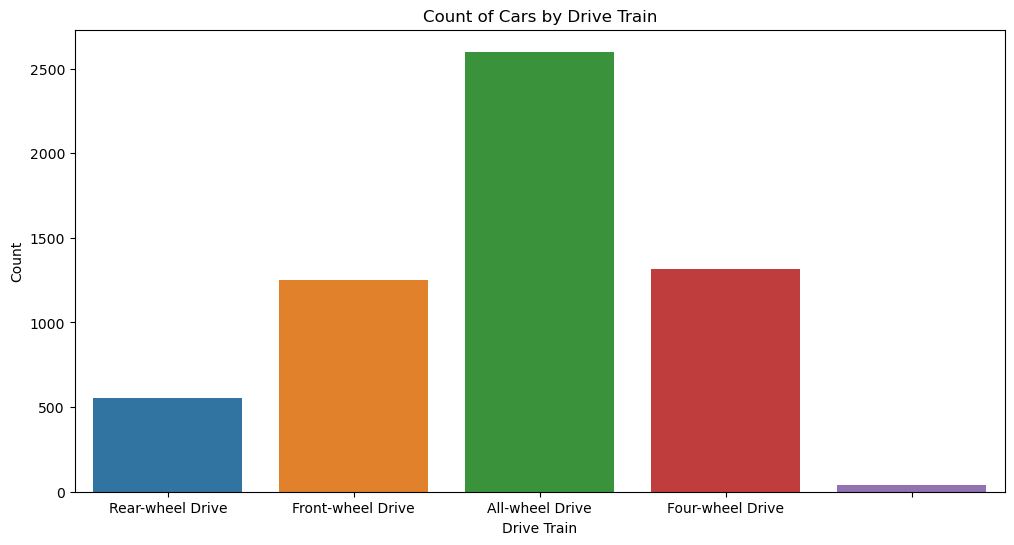

In [337]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Drive_Train', data=car4sales)
plt.title('Count of Cars by Drive Train')
plt.xlabel('Drive Train')
plt.ylabel('Count')
plt.show()

This chart shows that most of the cars fall within the All-wheel Drive category, followed by Four-wheel, Front-wheel and Rear-wheel Drive

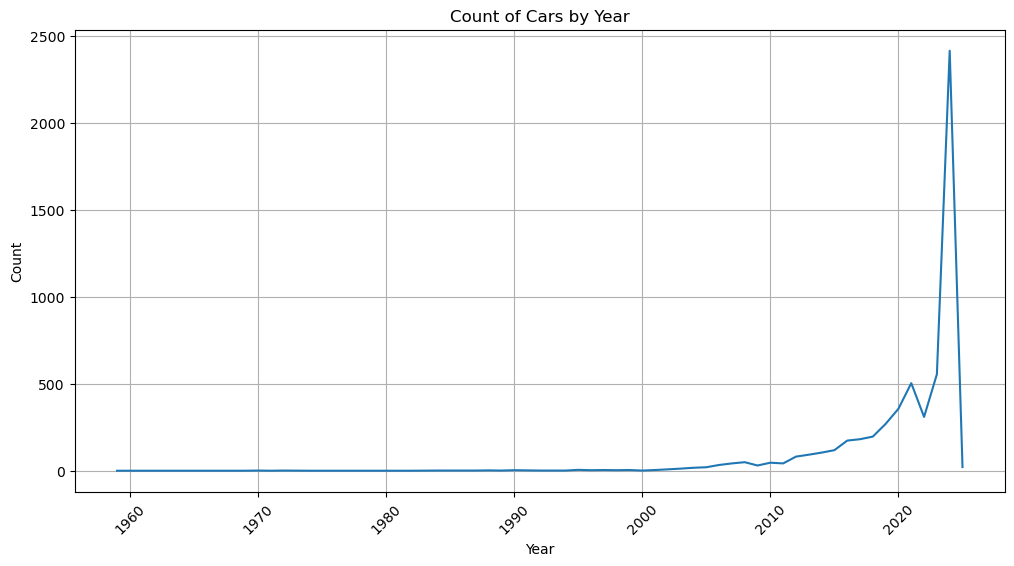

In [338]:
# Counting cars by year
car_count_by_year = car4sales['Year'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(car_count_by_year.index, car_count_by_year.values)
plt.title('Count of Cars by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

The majority of car models in the dataset appear to have been manufactured after the year 2000, based on the data represented in the line chart.

In [305]:
car4sales.columns

Index(['Make_Model', 'Year', 'Exterior_Color', 'Interior_Color', 'Mileage',
       'Price_$', 'Drive_Train', 'Seller_Rating', 'Seller_Rating_Count'],
      dtype='object')

In [323]:
interior_color_counts = car4sales['Interior_Color'].value_counts()
interior_color_counts= interior_color_counts.sort_values(ascending=False)
interior_color_counts= interior_color_counts.head(3)
interior_color_counts

Interior_Color
Black         2189
Gray           356
Jet Black      350
Name: count, dtype: int64

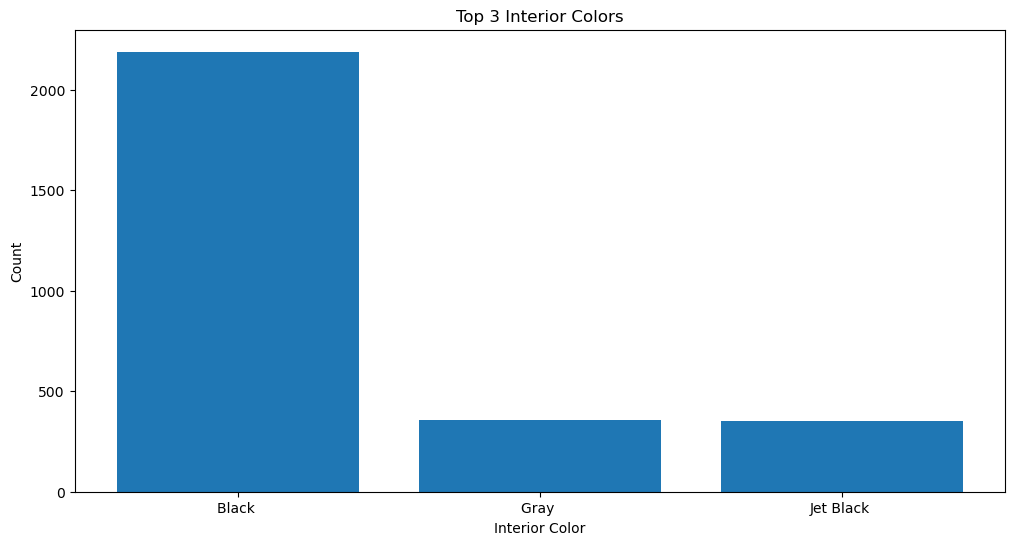

In [326]:
plt.figure(figsize=(12, 6))
plt.bar(interior_color_counts.index, interior_color_counts.values)
plt.title('Top 3 Interior Colors')
plt.xlabel('Interior Color')
plt.ylabel('Count')
plt.show()

Based on the chart, the top three interior colors that cars are predominantly manufactured in are Black,Gray,Jet black.

In [329]:
exterior_color_counts = car4sales['Exterior_Color'].value_counts()
exterior_color_counts= exterior_color_counts.sort_values(ascending=False)
exterior_color_counts= exterior_color_counts.head(5)
exterior_color_counts

Exterior_Color
 Black                      311
 Bright White Clearcoat     195
 White                      168
 Gray                       133
 Summit White               111
Name: count, dtype: int64

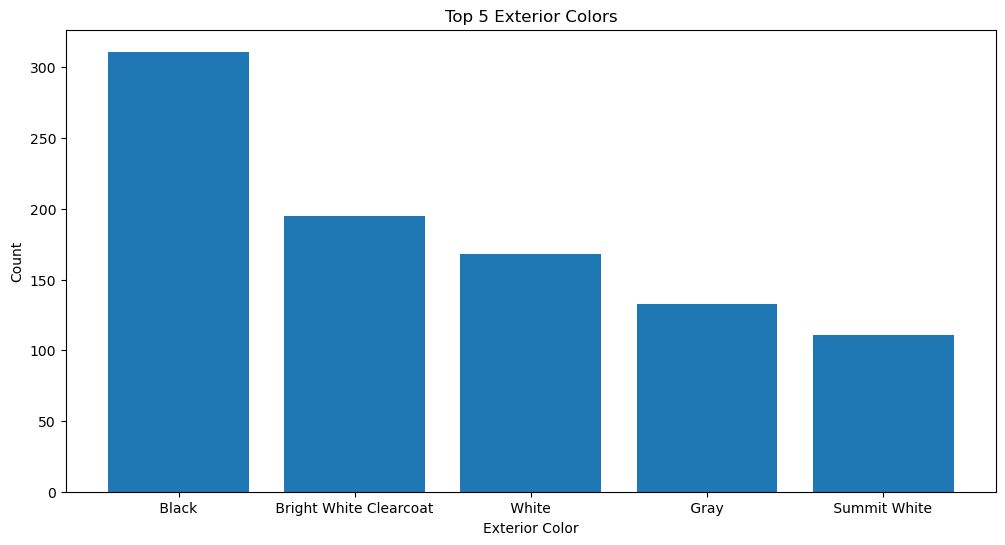

In [330]:
plt.figure(figsize=(12, 6))
plt.bar(exterior_color_counts.index, exterior_color_counts.values)
plt.title('Top 5 Exterior Colors')
plt.xlabel('Exterior Color')
plt.ylabel('Count')
plt.show()

Based on the chart, the top three interior colors that cars are predominantly manufactured in are Black, Brigh white clearcoat, White Gray, and 
Summer white

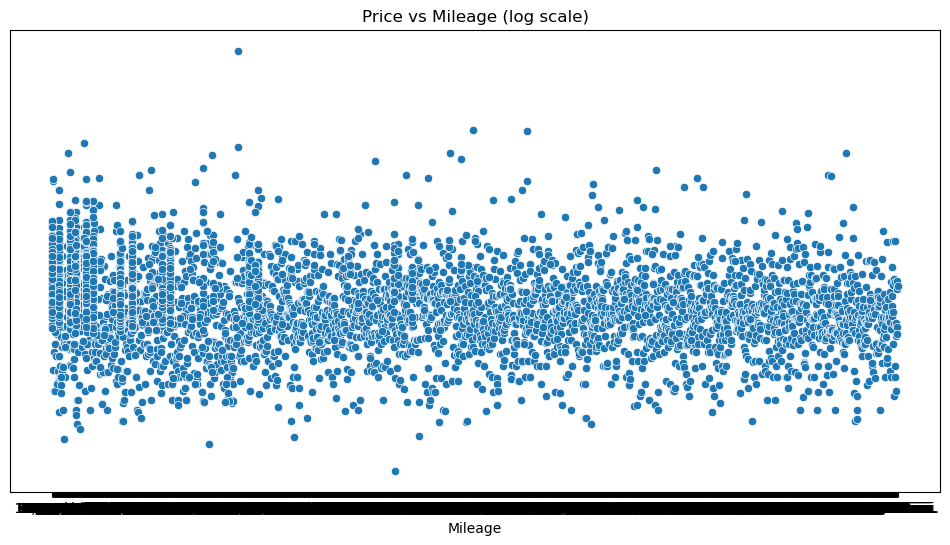

In [350]:
# Relationship between Price and Mileage
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Mileage', y='Price_$', data=car4sales)
plt.title('Price vs Mileage (log scale)')
plt.xlabel('Mileage')
plt.ylabel('Price ($)')
plt.yscale('log')
plt.gca().axes.yaxis.set_visible(False)
plt.show()

This chart shows that there is no relationship between price and mileage